<a href="https://colab.research.google.com/github/thaonguyen274/Data_preparation/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DA dữ liệu, xử lý dữ liệu dạng text, category, xử lý outlierm chạy thuật toán LR, KNN (tune tham số k), SVM (tune tham số kernel, C) cho dữ liệu:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from collections import Counter
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.svm import SVC, SVR

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# Cross Validation
from sklearn.model_selection import GridSearchCV
wr.filterwarnings('ignore')



In [106]:
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/DATA PREPARATION /winequality-red.csv')
cars = pd.read_csv('/content/drive/MyDrive/DATA PREPARATION /CarPrice_Assignment.csv')

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# inspect wine data
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


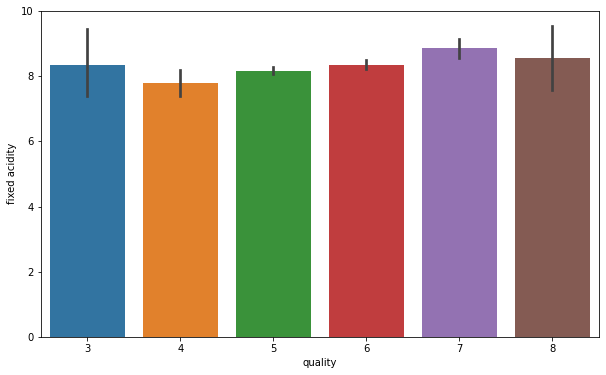

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

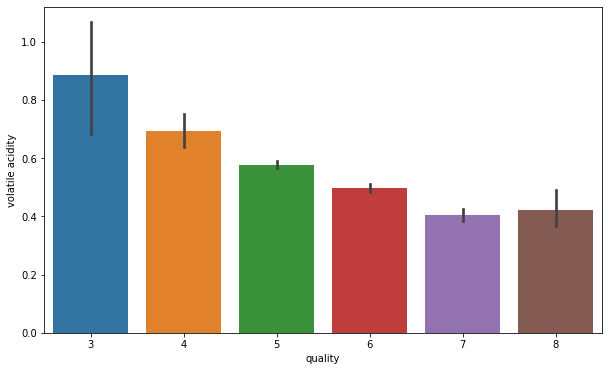

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

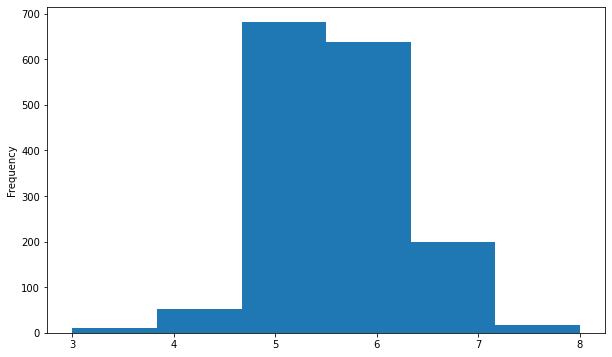

In [ ]:
fig = plt.figure(figsize = (10,6))
wine['quality'].plot(kind='hist', bins=6)

In [ ]:
def wine_linear_regression(data):
    print('                LINEAR REGRESSION MODEL                ')
    print('-------------------------------------------------------')
    # split data, with y as quality as X is the rest of the data
    X = data.drop('quality', axis = 1)
    y = data['quality']
    
    # split data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    print('Dimension after spliting: ',X_train.shape, X_test.shape)
    
    # initialize Regresion
    lm = LinearRegression()

    # fitting data
    lm.fit(X_train,y_train)
    pred_lm = lm.predict(X_test)

    # Metrics
    print('MAE:', metrics.mean_absolute_error(y_test, pred_lm))
    print('MSE:', metrics.mean_squared_error(y_test, pred_lm))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lm)))
    print('R-Squared: ',lm.score(X_train, y_train))

    print('-------------------------------------------------------\n')
    

In [ ]:
def wine_logistic_regression(data):
    print('                LOGISTICS REGRESSION MODEL             ')
    print('-------------------------------------------------------')
    # devide data into 2 part, good and bad
    bins = (2, 5.5, 8)
    group_names = ['bad', 'good']

    # split data and quality
    X = data.drop('quality', axis = 1)
    y = data['quality']

    # cut data into 2 half
    y = pd.cut(y, bins = bins, labels = group_names)


    # from 2 to 5 as bad, 6 to 8 as good
    # bad as 0 good as 1
    label_quality = LabelEncoder()
    y = label_quality.fit_transform(y)

    # split train test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # scale data into number
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)


    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred_lr = lr.predict(X_test)

    print(classification_report(y_test, pred_lr))
    print('-------------------------------------------------------\n')


In [ ]:
 def wine_knn(data, k_class=10):
    print('                 K NEAREST NEIGHBOR MODEL              ')
    print('-------------------------------------------------------')
    # split data into data and class
    X = data.drop('quality', axis = 1)
    y = data['quality']

    # split into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # try to split data into different number of classes
    knn = KNeighborsClassifier
    
    # test accuracy for each number of class
    accuracy_score = []
    for i in range(2, k_class + 1):
        classify = knn(n_neighbors=i)
        classify.fit(X_train, y_train)
        pred = classify.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, pred)
        accuracy_score.append(accuracy)
        if i % 5 == 0:
            print(f'Accuracy when try {i} class: {accuracy}')
    
    # show accuracy chart overtime
    plt.plot(accuracy_score)
    plt.show()
    print(f'The model with the best accuracy is: %.3f {max(accuracy_score)}')
    print('-------------------------------------------------------\n')


In [ ]:
def wine_svm(data):
    print('                        SVM MODEL                      ')
    print('-------------------------------------------------------')
    # split data into data and class
    X = data.drop('quality', axis = 1)
    y = data['quality']

    # Create training and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # scale data
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    
    C = [0.1, 1, 10, 100]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    print(f'                  ')
    for kernel in kernels:
        print(f'        {kernel}          ')
        accuracy = []
        for c in C:
            svc = SVC(C = c, random_state=1, kernel=kernel)
            # fit the model
            svc.fit(X_train_std, y_train)
            y_predict = svc.predict(X_test_std)
            # Measure the performance
            print("Accuracy score: %.3f" %metrics.accuracy_score(y_test, y_predict))
            accuracy.append(metrics.accuracy_score(y_test, y_predict))
        plt.plot(accuracy, label=kernel)
        plt.legend()


                LINEAR REGRESSION MODEL                
-------------------------------------------------------
Dimension after spliting:  (1119, 11) (480, 11)
MAE: 0.5133956082451124
MSE: 0.41123487175042023
RMSE: 0.6412759715991394
R-Squared:  0.36119824413213175
-------------------------------------------------------

                LOGISTICS REGRESSION MODEL             
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       213
           1       0.78      0.70      0.74       267

    accuracy                           0.72       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.72      0.72       480

-------------------------------------------------------

                 K NEAREST NEIGHBOR MODEL              
-------------------------------------------------------
Accuracy when try 5 class: 0.48541666666666666
Accuracy when try 10 c

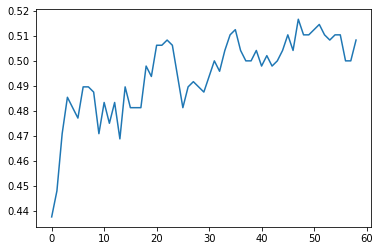

The model with the best accuracy is: %.3f 0.5166666666666667
-------------------------------------------------------

                        SVM MODEL                      
-------------------------------------------------------
                  
        linear          
Accuracy score: 0.560
Accuracy score: 0.558
Accuracy score: 0.560
Accuracy score: 0.562
        poly          
Accuracy score: 0.527
Accuracy score: 0.552
Accuracy score: 0.588
Accuracy score: 0.554
        rbf          
Accuracy score: 0.567
Accuracy score: 0.606
Accuracy score: 0.621
Accuracy score: 0.600
        sigmoid          
Accuracy score: 0.550
Accuracy score: 0.467
Accuracy score: 0.452
Accuracy score: 0.433


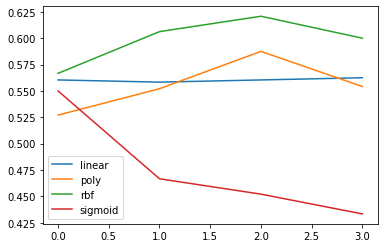

In [ ]:
wine_linear_regression(wine)
wine_logistic_regression(wine)
wine_knn(wine, 60)
wine_svm(wine)

In [ ]:
# inspect wine data
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
 cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

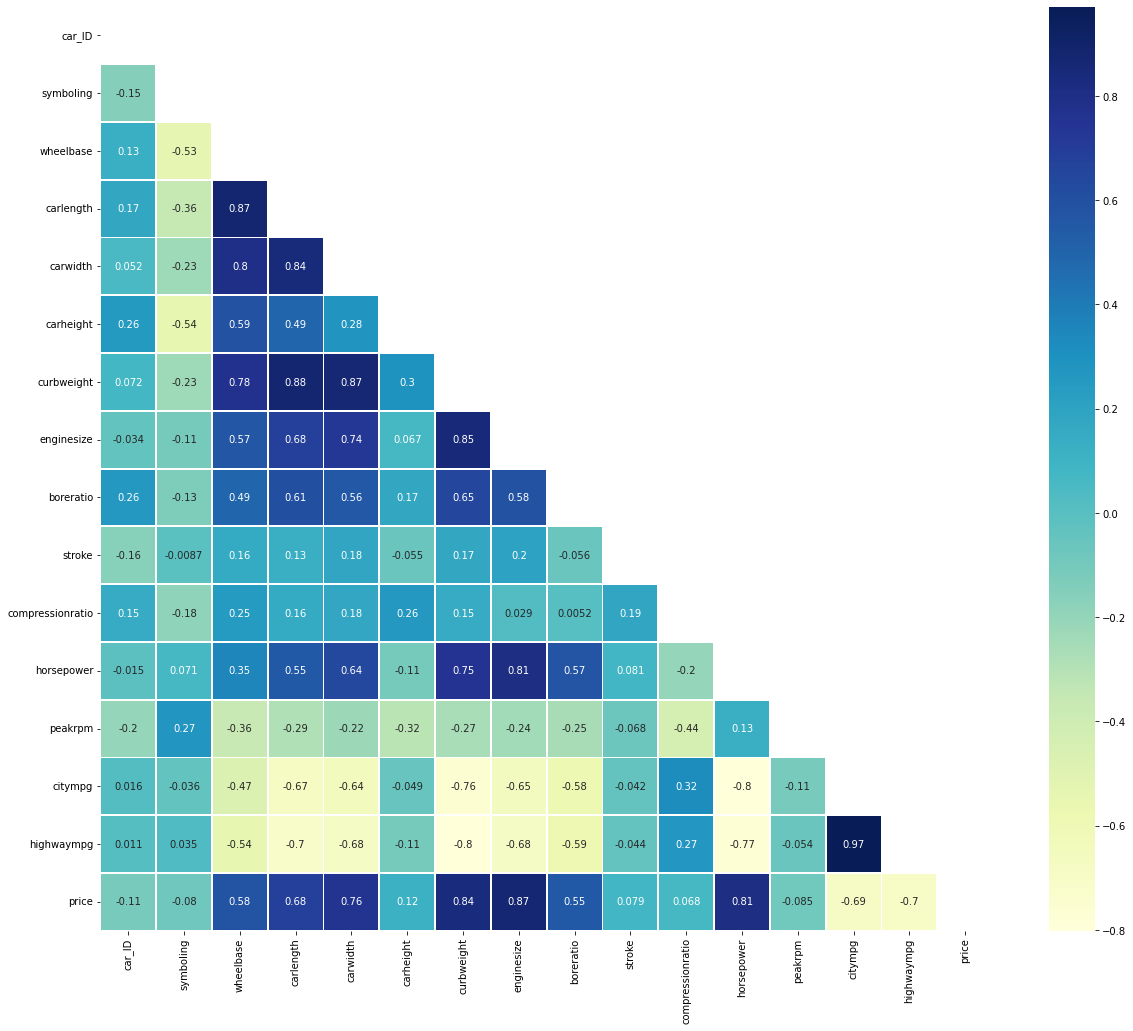

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (20, 17))
matrix = np.triu(cars.corr())
sns.heatmap(cars.corr(), annot = True, linewidth=.8, mask=matrix, cmap="YlGnBu")
plt.show()

In [ ]:
# splitting company name 
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
# view data after splitting
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



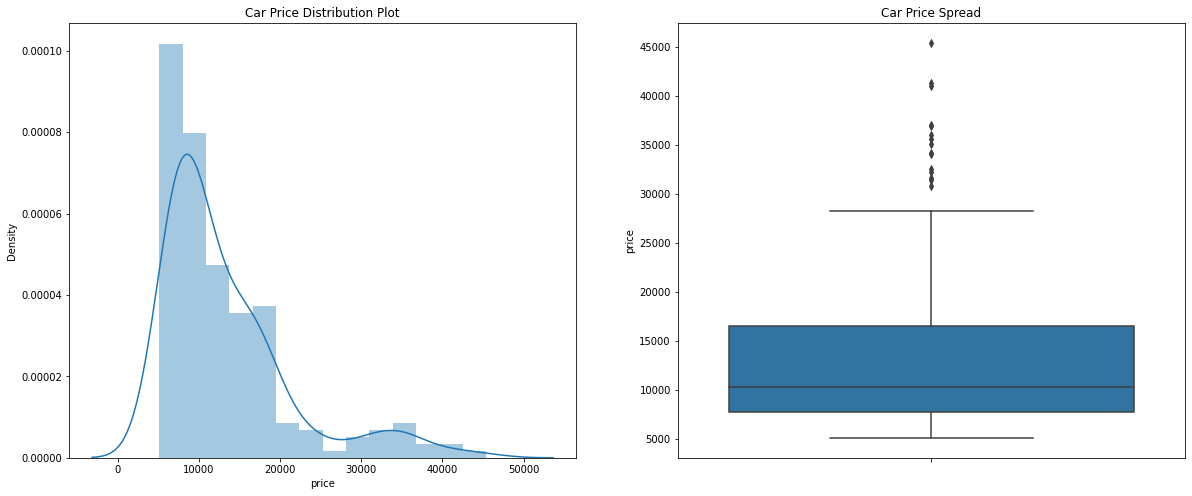

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

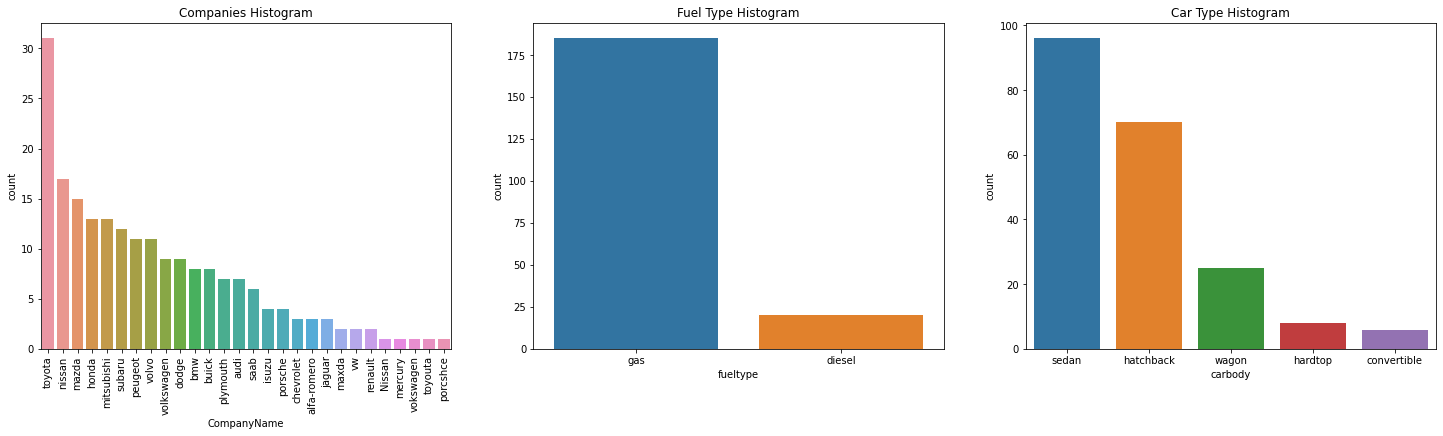

In [88]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt.xticks(rotation = 90)
order = cars['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=cars, order=order)
plt.title('Companies Histogram')

plt.subplot(1,3,2)
order = cars['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=cars, order=order)
plt.title('Fuel Type Histogram')

plt.subplot(1,3,3)
order = cars['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=cars, order=order)
plt.title('Car Type Histogram')

plt.show()

1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. Sedan is the top car type prefered.

In [89]:
num_feature=[ 'wheelbase', 'carlength', 'carwidth', 
             'carheight', 'curbweight',  'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

cat_feature=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
             'enginetype', 'fuelsystem','symboling', 'doornumber', 'cylindernumber']

In [91]:
car_num = pd.DataFrame()
for i in num_feature:
  car_num[i] = cars[i]
car_num['price'] = cars['price']
car_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [92]:
car_cat = pd.DataFrame()
for i in cat_feature:
  car_cat[i] = cars[i]
car_cat['price'] = cars['price']
car_cat.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,symboling,doornumber,cylindernumber,price
0,gas,std,convertible,rwd,front,dohc,mpfi,3,two,four,13495.0
1,gas,std,convertible,rwd,front,dohc,mpfi,3,two,four,16500.0
2,gas,std,hatchback,rwd,front,ohcv,mpfi,1,two,six,16500.0
3,gas,std,sedan,fwd,front,ohc,mpfi,2,four,four,13950.0
4,gas,std,sedan,4wd,front,ohc,mpfi,2,four,five,17450.0


In [93]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):    
    column_names = dataset.columns.values
    number_of_column = len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'box'in plot_type :
                sns.boxplot(y=dataset.iloc[: , -1], x=column_names[counter],data=dataset, ax=axarr[i][j], palette='RdBu')
            elif 'bar' in plot_type:
                sns.barplot(y=dataset.iloc[: , -1],x=column_names[counter],data=dataset, ax=axarr[i][j], palette='RdBu')
            elif 'his' in plot_type:
                sns.countplot(column_names[counter],data=dataset, ax=axarr[i][j], palette='RdBu')

            counter+=1
            if counter==(number_of_column-1,):
                break

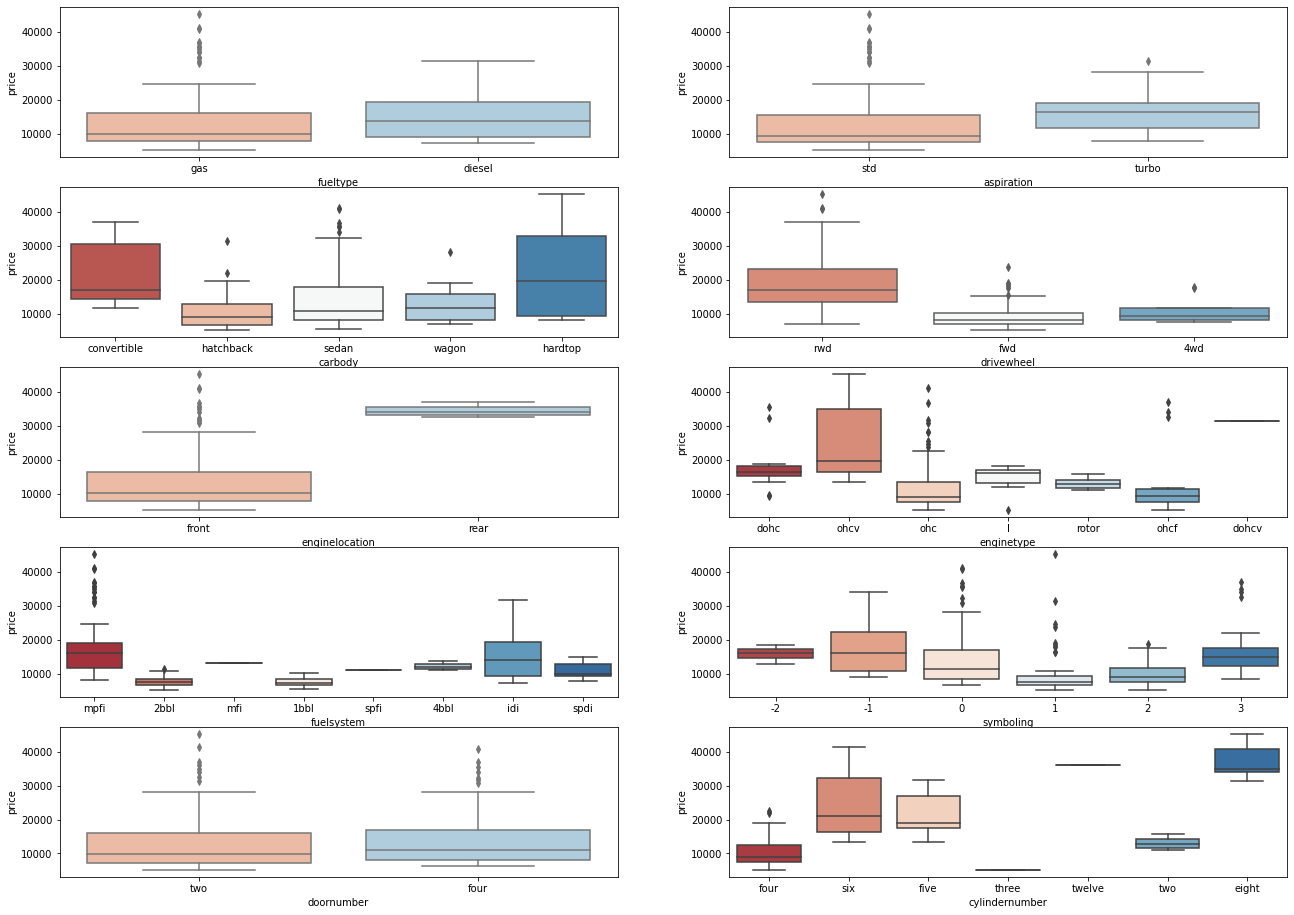

In [94]:
draw_multivarient_plot(car_cat,5,2,"box")

In [96]:
dummies = pd.get_dummies(cars[cat_feature])

car_data = pd.concat([cars[num_feature+['price']], dummies], axis=1)
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,doornumber_four,doornumber_two,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,3,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,3,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
num_vars = num_feature + ['price']
car_data[num_vars] = scaler.fit_transform(car_data[num_vars])

X = car_data.drop('price', axis=1)
y = car_data['price']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

###Linear Regression

In [100]:
ln = LinearRegression()
ln.fit(X_train, y_train)
pred_ln = ln.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred_ln))
print('MSE:', metrics.mean_squared_error(y_test, pred_ln))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ln)))
print('R-Squared: ',ln.score(X_train, y_train))

MAE: 0.2816545332808633
MSE: 0.15851421836969862
RMSE: 0.39813844121071584
R-Squared:  0.9476416372236126


###K-Nearest Neighbors - KNN

In [109]:
param_grid = {'n_neighbors':np.arange(1,50), 'weights':['uniform','distance'], 'leaf_size':np.arange(1,10)}
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print('--------')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared: ',knn.score(X_train, y_train))

{'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}
0.7915073347074861
--------
MAE: 0.3498489752054786
MSE: 0.35491242043850585
RMSE: 0.595745264721849
R-Squared:  0.8667429202875201


###Support Vector Regression - SVR

In [108]:
param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100]}
svm = SVR()
svm_cv = GridSearchCV(svm, param, cv=5)
svm_cv.fit(X_train, y_train)
y_pred = svm_cv.predict(X_test)
print(svm_cv.best_params_)
print(svm_cv.best_score_)
print('--------')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared: ',svm_cv.score(X_train, y_train))

{'C': 10, 'kernel': 'poly'}
0.8863785296583446
--------
MAE: 0.2665423604063079
MSE: 0.20130862039709252
RMSE: 0.44867429210630344
R-Squared:  0.9883290936646666
